# Subsetting MMETSP samples by transcriptome evaluation metrics

Separate issues: absolute metrics and relative metrics compared to the original NCGR assemblies. Must perform "Poorly" or "Well" from each point of view.

# Poor

* n contigs (large differences between NCGR and DIB)
* unique k-mers (k=25)
* annotations
* Complete BUSCO
* % ORF

In [689]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import matplotlib as mpl
import numpy
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


/Users/johnsolk/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [140]:
special_flowers = ['MMETSP0693', 'MMETSP1019', 'MMETSP0923', 'MMETSP0008', 'MMETSP1002', 'MMETSP1325', 'MMETSP1018', 
                   'MMETSP1346', 'MMETSP0088', 'MMETSP0092', 'MMETSP0717', 'MMETSP0223', 'MMETSP0115', 'MMETSP0196', 
                   'MMETSP0197', 'MMETSP0398', 'MMETSP0399', 'MMETSP0922']

In [141]:
unique_names = pd.read_csv("../assembly_evaluation_data/unique_gene_names_ncgr_dib.csv")

In [807]:
giant_matrix = "../assembly_evaluation_data/MMETSP_all_evaluation_matrix_2.csv"
all_metrics = pd.read_csv(giant_matrix)
#all_metrics.columns.values
# transrate score metrics
all_metrics = all_metrics[~all_metrics['SampleName'].isin(special_flowers)]
ncgr_cds_transrate_score = all_metrics[['SampleName', 'score.y','mean_orf_percent.y']]
ncgr_nt_transrate_score = all_metrics[['SampleName','score.x']]
dib_transrate_score = all_metrics[['SampleName','score']]
ncgr_nt_transrate_score.columns = ['SampleName','score']
ncgr_cds_transrate_score.columns = ['SampleName','score','mean_orf_percent']
#transrate reference metrics
ncgr_transrate_nt = all_metrics[['SampleName','p_refs_with_CRBB.y','n_seqs.x','mean_orf_percent.x']]
dib_transrate_nt = all_metrics[['SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent']]
ncgr_transrate_nt.columns = ['SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent']
# BUSCO
dib_busco_v3_euk = all_metrics[['SampleName','DIB.Complete_BUSCO_perc_euk_v3']]
dib_busco_v3_protist = all_metrics[['SampleName','DIB.Complete_BUSCO_perc_protist_v3']]
ncgr_busco_v3_euk = all_metrics[['SampleName','NCGR.Complete_BUSCO_perc_euk_v3']]
ncgr_busco_v3_protist = all_metrics[['SampleName','NCGR.Complete_BUSCO_perc_protist_v3']]
# unique dammit names
unique_dammit_names = pd.read_csv("../assembly_evaluation_data/normalized_unique_gene_names_ncgr_dib.csv")
unique_dammit_names = unique_dammit_names[~unique_dammit_names['MMETSP_id'].isin(special_flowers)]
unique_dammit_names.columns = ['Blank','SampleName','NCGR','DIB']
# kmers
ncgr_nt_kmers = pd.read_table("../assembly_evaluation_data/unique_kmers_ncgr_nt.txt",header=0,sep='\t')
ncgr_nt_kmers.columns = ['SampleName','unique_kmers_ncgr_nt']
dib_ncgr_kmers = all_metrics[["SampleName","Phylum","dib_assembly_unique_kmers","ncgr_assembly_unique_kmers"]]
dib_ncgr_kmers.columns = ["SampleName","Phylum","unique_kmers_dib","unique_kmers_ncgr_cds"]
dib_ncgr_kmers = pd.merge(ncgr_nt_kmers,dib_ncgr_kmers,on='SampleName')

In [808]:
n_seqs_max = all_metrics['n_seqs'].describe()[['max']][0]
score_max = all_metrics['score'].describe()[['max']][0]
orf_max = all_metrics['mean_orf_percent.y'].describe()[['max']][0]
largest_contig_max = all_metrics['largest.x'].describe()[['max']][0]
BUSCO_max = all_metrics['DIB.Complete_BUSCO_perc_euk_v3'].describe()[['max']][0]
unique_kmers_max = all_metrics['dib_assembly_unique_kmers'].describe()[['max']][0]

In [809]:
#ncgr_cds_transrate_score = ncgr_cds_transrate_score.drop_duplicates()
#ncgr_nt_transrate_score = ncgr_nt_transrate_score.drop_duplicates()
#dib_transrate_score = dib_transrate_score.drop_duplicates()
ncgr_cds_transrate_score = ncgr_cds_transrate_score.dropna()
ncgr_nt_transrate_score = ncgr_nt_transrate_score.dropna()
dib_transrate_score = dib_transrate_score.dropna()

In [810]:
# dammit gene names comparison
gene_names = unique_names.drop_duplicates()
# giant matrix of all metrics, including phyla
#all_metrics = all_metrics.drop_duplicates()

# n contigs

In [811]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
# Contigs where NCGR had higher contigs than DIB
low_dib_contigs = combined_df.loc[combined_df['n_seqs_x'] > combined_df['n_seqs_y']]['SampleName_x']
print(low_dib_contigs.tolist())
print(len(low_dib_contigs.tolist()))

['MMETSP0013', 'MMETSP0045', 'MMETSP0121', 'MMETSP0132', 'MMETSP0229', 'MMETSP0268', 'MMETSP0329', 'MMETSP0378', 'MMETSP0380', 'MMETSP0759', 'MMETSP0932', 'MMETSP1148']
12


# % ORF

In [812]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
low_dib_ORF = combined_df.loc[combined_df['mean_orf_percent_x'] > combined_df['mean_orf_percent_y']]['SampleName_x']
print(low_dib_ORF.tolist())
print(len(low_dib_ORF.tolist()))

['MMETSP0010', 'MMETSP0011', 'MMETSP0013', 'MMETSP0014', 'MMETSP0015', 'MMETSP0017', 'MMETSP0034', 'MMETSP0038', 'MMETSP0040', 'MMETSP0044', 'MMETSP0046', 'MMETSP0098', 'MMETSP0132', 'MMETSP0229', 'MMETSP0347', 'MMETSP0359', 'MMETSP0361', 'MMETSP0451', 'MMETSP0469', 'MMETSP0780', 'MMETSP0807', 'MMETSP0886', 'MMETSP0887', 'MMETSP0888', 'MMETSP0915', 'MMETSP0916', 'MMETSP0917', 'MMETSP0924', 'MMETSP1012', 'MMETSP1055', 'MMETSP1103', 'MMETSP1147', 'MMETSP1148', 'MMETSP1163', 'MMETSP1166', 'MMETSP1329', 'MMETSP1344', 'MMETSP1359', 'MMETSP1397', 'MMETSP1426', 'MMETSP1433', 'MMETSP1435']
42


# BUSCO

In [813]:
df1=ncgr_busco_v3_euk.dropna()
df2=dib_busco_v3_euk.dropna()
combined_df = pd.merge(df1, df2,on='SampleName')
column='Complete_BUSCO_perc'
low_dib_BUSCO = combined_df.loc[combined_df['NCGR.Complete_BUSCO_perc_euk_v3'] > combined_df['DIB.Complete_BUSCO_perc_euk_v3']]['SampleName']
#print(low_dib_contigs.tolist())
print(len(low_dib_BUSCO.tolist()))

381


In [814]:
# Where difference is more than 30% between NCGR and DIB
df1=ncgr_busco_v3_euk
df2=dib_busco_v3_euk
df2=dib_busco_v3_euk
column='Complete_BUSCO_perc'
df1name = 'df1'
df2name = 'df2'
df1.columns = ['SampleName', 'Complete_BUSCO_perc_NCGR']
df2.columns = ['SampleName', 'Complete_BUSCO_perc_DIB']
combined_df = pd.merge(df1, df2,on='SampleName')
print(combined_df.shape)
print('NCGR:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_NCGR'] > combined_df['Complete_BUSCO_perc_DIB']]))
print('DIB:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_NCGR'] < combined_df['Complete_BUSCO_perc_DIB']]))
print('DIB = NCGR:',len(combined_df.loc[combined_df['Complete_BUSCO_perc_NCGR'] == combined_df['Complete_BUSCO_perc_DIB']]))
diff = combined_df.loc[(combined_df['Complete_BUSCO_perc_NCGR'] - combined_df['Complete_BUSCO_perc_DIB']) > 30]
low_BUSCO = diff['SampleName'].tolist()
print(low_BUSCO)
print(len(low_BUSCO))

(660, 3)
NCGR: 381
DIB: 235
DIB = NCGR: 42
['MMETSP0045', 'MMETSP0121', 'MMETSP0169', 'MMETSP0232', 'MMETSP0329', 'MMETSP0439', 'MMETSP0932']
7


# annotations

# Low unique dammit names in DIB

In [815]:
unique_dammit_names_dib_low = unique_dammit_names.loc[unique_dammit_names['DIB'] - unique_dammit_names['NCGR'] < 0]

In [816]:
print(unique_dammit_names_dib_low['SampleName'].tolist())
print(len(unique_dammit_names_dib_low['SampleName'].tolist()))

['MMETSP1412', 'MMETSP0380', 'MMETSP0378', 'MMETSP0232', 'MMETSP1148', 'MMETSP0912', 'MMETSP0169', 'MMETSP0937', 'MMETSP1057']
9


# unique k-mers

In [817]:
dib_low_kmers = dib_ncgr_kmers.loc[dib_ncgr_kmers['unique_kmers_dib'] - dib_ncgr_kmers['unique_kmers_ncgr_nt'] < 0]
low_kmers = dib_low_kmers['SampleName'].tolist()
print(low_kmers)
print(len(low_kmers))

['MMETSP0372', 'MMETSP0121', 'MMETSP0113', 'MMETSP0891', 'MMETSP0932', 'MMETSP0252', 'MMETSP1065', 'MMETSP0045', 'MMETSP0930', 'MMETSP0380', 'MMETSP0169', 'MMETSP0152', 'MMETSP1358', 'MMETSP1148', 'MMETSP0232', 'MMETSP0439', 'MMETSP0268', 'MMETSP0229', 'MMETSP1178', 'MMETSP0329', 'MMETSP0315']
21


In [818]:
low_contigs = low_dib_contigs.tolist()
low_unique_annotation_names = unique_dammit_names_dib_low['SampleName'].tolist()
low_ORF = low_dib_ORF.tolist()

In [827]:
low_MMETSP = low_kmers + low_unique_annotation_names + low_BUSCO + low_ORF + low_kmers

In [828]:
print(sorted(set(low_MMETSP)))

['MMETSP0010', 'MMETSP0011', 'MMETSP0013', 'MMETSP0014', 'MMETSP0015', 'MMETSP0017', 'MMETSP0034', 'MMETSP0038', 'MMETSP0040', 'MMETSP0044', 'MMETSP0045', 'MMETSP0046', 'MMETSP0098', 'MMETSP0113', 'MMETSP0121', 'MMETSP0132', 'MMETSP0152', 'MMETSP0169', 'MMETSP0229', 'MMETSP0232', 'MMETSP0252', 'MMETSP0268', 'MMETSP0315', 'MMETSP0329', 'MMETSP0347', 'MMETSP0359', 'MMETSP0361', 'MMETSP0372', 'MMETSP0378', 'MMETSP0380', 'MMETSP0439', 'MMETSP0451', 'MMETSP0469', 'MMETSP0780', 'MMETSP0807', 'MMETSP0886', 'MMETSP0887', 'MMETSP0888', 'MMETSP0891', 'MMETSP0912', 'MMETSP0915', 'MMETSP0916', 'MMETSP0917', 'MMETSP0924', 'MMETSP0930', 'MMETSP0932', 'MMETSP0937', 'MMETSP1012', 'MMETSP1055', 'MMETSP1057', 'MMETSP1065', 'MMETSP1103', 'MMETSP1147', 'MMETSP1148', 'MMETSP1163', 'MMETSP1166', 'MMETSP1178', 'MMETSP1329', 'MMETSP1344', 'MMETSP1358', 'MMETSP1359', 'MMETSP1397', 'MMETSP1412', 'MMETSP1426', 'MMETSP1433', 'MMETSP1435']


In [829]:
print(len(sorted(set(low_MMETSP))))

66


In [830]:
low_all_table = all_metrics[all_metrics['SampleName'].isin(low_MMETSP)]
low_all_table = low_all_table[['SampleName','Phylum','n_seqs.1','score','mean_orf_percent.y.1','largest.y.1','DIB.Complete_BUSCO_perc_euk_v3','dib_assembly_unique_kmers']]
print(low_all_table.head())

    SampleName           Phylum  n_seqs.1    score  mean_orf_percent.y.1  \
7   MMETSP0010  Bacillariophyta   43375.0  0.25090              67.98617   
8   MMETSP0011       Rhodophyta   45875.0  0.10862              41.82596   
9   MMETSP0013  Bacillariophyta   38251.0  0.27803              77.94483   
10  MMETSP0014  Bacillariophyta   63046.0  0.24811              74.16254   
11  MMETSP0015  Bacillariophyta   63642.0  0.23404              74.92930   

    largest.y.1  DIB.Complete_BUSCO_perc_euk_v3  dib_assembly_unique_kmers  
7       13866.0                       73.597360                   24840436  
8       18160.0                       92.409241                   19018154  
9       17601.0                       83.828383                   33217106  
10      18219.0                       82.838284                   42853543  
11      14591.0                       79.537954                   48027372  


In [831]:
print(low_all_table.shape)

(66, 8)


In [832]:
low_all_table.head()

,SampleName,Phylum,n_seqs.1,score,mean_orf_percent.y.1,largest.y.1,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers
7,MMETSP0010,Bacillariophyta,43375.0,0.25090,67.98617,13866.0,73.597360,24840436
8,MMETSP0011,Rhodophyta,45875.0,0.10862,41.82596,18160.0,92.409241,19018154
9,MMETSP0013,Bacillariophyta,38251.0,0.27803,77.94483,17601.0,83.828383,33217106
10,MMETSP0014,Bacillariophyta,63046.0,0.24811,74.16254,18219.0,82.838284,42853543
11,MMETSP0015,Bacillariophyta,63642.0,0.23404,74.92930,14591.0,79.537954,48027372


In [833]:
low_all_table[['DIB.Complete_BUSCO_perc_euk_v3']] = low_all_table[['DIB.Complete_BUSCO_perc_euk_v3']].astype(float)

Absolute poor metrics, must comply with one of the following:
* trouble running Trinity
* low n_seqs, < 1000
* largest, < 1000
* low BUSCO, < 10%
* low unique k-mers, < 1 million
* low score, < 0.1

Not relevant: % ORF and annotations in absolute numbers. Just relative metrics.

In [834]:
low_all_table.columns

Index(['SampleName', 'Phylum', 'n_seqs.1', 'score', 'mean_orf_percent.y.1',
       'largest.y.1', 'DIB.Complete_BUSCO_perc_euk_v3',
       'dib_assembly_unique_kmers'],
      dtype='object')

In [835]:
low_all_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 7 to 684
Data columns (total 8 columns):
SampleName                        66 non-null object
Phylum                            66 non-null object
n_seqs.1                          66 non-null float64
score                             62 non-null float64
mean_orf_percent.y.1              66 non-null float64
largest.y.1                       66 non-null float64
DIB.Complete_BUSCO_perc_euk_v3    66 non-null float64
dib_assembly_unique_kmers         66 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.6+ KB


# Good

* Complete BUSCO > 80%
* % ORF > 90%
* Transrate score > 50%
* length transcripts > 30K bases
* unique annotations > 50%
* unique k-mers (k=25) > 50 million more than NCGR
* Number of contigs ??

# BUSCO > 90%

In [804]:
# Greater than 80% Complete
df2=dib_busco_v3_euk
df2.columns = ['SampleName', 'Complete_BUSCO_perc_DIB']

high_DIB = df2.loc[df2['Complete_BUSCO_perc_DIB'] > 90]['SampleName']
print(high_DIB.tolist())
print(len(high_DIB.tolist()))
high_DIB_BUSCO = high_DIB.tolist()

['MMETSP0011', 'MMETSP0098', 'MMETSP0168', 'MMETSP0308', 'MMETSP0447', 'MMETSP0807', 'MMETSP1089', 'MMETSP1433']
8


# Transrate score

In [55]:
df2=dib_transrate_score
high_dib_transrate = df2.loc[df2['score'] > 0.5]['SampleName']
#print(low_dib_contigs.tolist())
print(len(high_dib_transrate.tolist()))
high_dib_transrate = high_dib_transrate.tolist()
print(high_dib_transrate)

3
['MMETSP0233', 'MMETSP0234', 'MMETSP0759']


# % ORF > 95%

In [53]:
df2=dib_transrate_nt
high_dib_ORF = df2.loc[df2['mean_orf_percent'] > 95]['SampleName']
#print(high_dib_ORF.tolist())
high_dib_ORF = high_dib_ORF.tolist()
print(len(high_dib_ORF))
print(high_dib_ORF)

7
['MMETSP0096', 'MMETSP0209', 'MMETSP0228', 'MMETSP0503', 'MMETSP1436', 'MMETSP1452', 'MMETSP1462']


# Length > 30K bases

In [56]:
DIB_longest = all_metrics[['SampleName','largest.x']]
DIB_longest = DIB_longest.loc[DIB_longest['largest.x'] > 30000]['SampleName']
print(len(DIB_longest.tolist()))
DIB_longest = DIB_longest.tolist()
print(DIB_longest)

6
['MMETSP0039', 'MMETSP0929', 'MMETSP1060', 'MMETSP1321', 'MMETSP1399', 'MMETSP1433']


# Unique normalized annotated contigs > 70%

In [169]:
unique_dammit_names = pd.read_csv("../assembly_evaluation_data/normalized_unique_gene_names_ncgr_dib.csv")
unique_dammit_names = unique_dammit_names[~unique_dammit_names['MMETSP_id'].isin(special_flowers)]
unique_dammit_names.columns = ['Blank','SampleName','NCGR','DIB']

In [171]:
high_unique_annotation_names = unique_dammit_names.loc[unique_dammit_names['DIB'] > 0.8]['SampleName']
print(len(high_unique_annotation_names.tolist()))
high_unique_annotation_names = high_unique_annotation_names.tolist()
print(high_unique_annotation_names)

4
['MMETSP0225', 'MMETSP0044', 'MMETSP0018', 'MMETSP0347']


# Unique k-mers, more than 50 million more unique k-mers in DIB vs. NCGR

In [61]:
dib_high_kmers = dib_ncgr_kmers.loc[dib_ncgr_kmers['unique_kmers_dib'] - dib_ncgr_kmers['unique_kmers_ncgr_nt'] > 50000000]
dib_high_kmers = dib_high_kmers['SampleName'].tolist()
print(len(dib_high_kmers))
print(dib_high_kmers)

3
['MMETSP1015', 'MMETSP0574', 'MMETSP0039']


In [63]:
high_MMETSP = high_DIB_BUSCO + high_dib_transrate + high_dib_ORF + DIB_longest + high_unique_annotation_names + dib_high_kmers

In [73]:
print(sorted(high_MMETSP))

['MMETSP0011', 'MMETSP0018', 'MMETSP0039', 'MMETSP0039', 'MMETSP0044', 'MMETSP0096', 'MMETSP0098', 'MMETSP0168', 'MMETSP0209', 'MMETSP0225', 'MMETSP0228', 'MMETSP0229', 'MMETSP0233', 'MMETSP0234', 'MMETSP0308', 'MMETSP0347', 'MMETSP0447', 'MMETSP0503', 'MMETSP0574', 'MMETSP0759', 'MMETSP0807', 'MMETSP0929', 'MMETSP1015', 'MMETSP1060', 'MMETSP1089', 'MMETSP1321', 'MMETSP1399', 'MMETSP1433', 'MMETSP1433', 'MMETSP1436', 'MMETSP1452', 'MMETSP1462']


In [65]:
len(list(set(high_MMETSP)))

30

# Subsetting High

In [909]:
high_all_table = all_metrics
high_all_table = high_all_table[['SampleName','Phylum','n_seqs','score','mean_orf_percent','largest.x','DIB.Complete_BUSCO_perc_euk_v3','dib_assembly_unique_kmers']]
print(high_all_table.shape)

(660, 8)


In [910]:
high_all_table.head()

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers
0,MMETSP0004,Ochrophyta,33559.0,0.38093,81.26381,17276.0,69.636964,19837761
1,MMETSP0005,Ochrophyta,32824.0,0.38214,80.15649,11058.0,67.326733,20350054
2,MMETSP0006,Haptophyta,47463.0,0.38143,80.79508,15370.0,55.775578,25286098
3,MMETSP0007,Haptophyta,30922.0,0.27164,71.01950,6567.0,30.363036,12496793
6,MMETSP0009,Bacillariophyta,54275.0,0.25534,80.37076,10587.0,46.534653,30074483


In [911]:
high_all_table.shape

(660, 8)

In [912]:
#high_all_table_filtered = high_all_table_filtered.set_index('SampleName')

In [913]:
high_all_table.columns

Index(['SampleName', 'Phylum', 'n_seqs', 'score', 'mean_orf_percent',
       'largest.x', 'DIB.Complete_BUSCO_perc_euk_v3',
       'dib_assembly_unique_kmers'],
      dtype='object')

In [936]:
n_seqs_cutoff = high_all_table['n_seqs'].describe()[['75%']][0]
print(n_seqs_cutoff)
score_cutoff = high_all_table['score'].describe()[['75%']][0]
print(score_cutoff)
orf_cutoff = high_all_table['mean_orf_percent'].describe()[['75%']][0]
print(orf_cutoff)
largest_contig_cutoff = high_all_table['largest.x'].describe()[['75%']][0]
print(largest_contig_cutoff)
BUSCO_cutoff = high_all_table['DIB.Complete_BUSCO_perc_euk_v3'].describe()[['75%']][0]
print(BUSCO_cutoff)
unique_kmers_cutoff = high_all_table['dib_assembly_unique_kmers'].describe()[['75%']][0]
print(unique_kmers_cutoff)

54783.0
0.37296
88.46954
14351.0
75.57755776
33219562.0


In [937]:
high_all_table_ranked = high_all_table
high_all_table_ranked['n_seqs_ranked'] = (high_all_table_ranked['n_seqs'].rank(ascending=1)/660)*100
high_all_table_ranked['largest_ranked'] = (high_all_table_ranked['largest.x'].rank(ascending=1)/660)*100
high_all_table_ranked['score_ranked'] = (high_all_table_ranked['score'].rank(ascending=1)/660)*100
high_all_table_ranked['unique_kmers_ranked'] = (high_all_table_ranked['dib_assembly_unique_kmers'].rank(ascending=1)/660)*100
high_all_table_ranked['BUSCO_ranked'] = (high_all_table_ranked['DIB.Complete_BUSCO_perc_euk_v3'].rank(ascending=1)/660)*100
high_all_table_ranked['orf_ranked'] = (high_all_table_ranked['mean_orf_percent'].rank(ascending=1)/660)*100

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [938]:
high_all_table_ranked.head()

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers,n_seqs_ranked,largest_ranked,score_ranked,unique_kmers_ranked,BUSCO_ranked,orf_ranked
0,MMETSP0004,Ochrophyta,33559.0,0.38093,81.26381,17276.0,69.636964,19837761,43.181818,88.030303,76.666667,33.484848,57.121212,40.606061
1,MMETSP0005,Ochrophyta,32824.0,0.38214,80.15649,11058.0,67.326733,20350054,40.303030,47.575758,77.121212,35.151515,50.454545,35.000000
2,MMETSP0006,Haptophyta,47463.0,0.38143,80.79508,15370.0,55.775578,25286098,67.121212,80.303030,76.818182,53.030303,24.621212,37.878788
3,MMETSP0007,Haptophyta,30922.0,0.27164,71.01950,6567.0,30.363036,12496793,33.939394,13.181818,24.469697,12.727273,7.121212,9.242424
6,MMETSP0009,Bacillariophyta,54275.0,0.25534,80.37076,10587.0,46.534653,30074483,73.787879,45.151515,20.757576,67.272727,15.075758,35.909091


In [939]:
high_heatmap_filtered = high_all_table_ranked[(high_all_table_ranked['DIB.Complete_BUSCO_perc_euk_v3'] > BUSCO_cutoff) &
                                         (high_all_table_ranked['dib_assembly_unique_kmers'] > unique_kmers_cutoff) &
                                         (high_all_table_ranked['n_seqs'] > n_seqs_cutoff) &
                                         (high_all_table_ranked['largest.x'] > largest_contig_cutoff)]
                                         #(high_all_table['score'] > score_cutoff)]

In [940]:
high_heatmap_filtered.shape

(12, 14)

In [941]:
high_heatmap_filtered

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers,n_seqs_ranked,largest_ranked,score_ranked,unique_kmers_ranked,BUSCO_ranked,orf_ranked
10,MMETSP0014,Bacillariophyta,63046.0,0.24811,74.16254,18219.0,82.838284,42853543,77.121212,90.606061,18.181818,84.545455,92.424242,15.303030
11,MMETSP0015,Bacillariophyta,63642.0,0.23404,74.92930,14591.0,79.537954,48027372,77.727273,75.606061,14.545455,86.666667,86.893939,16.969697
21,MMETSP0034,Chlorophyta,73008.0,0.26179,79.09444,28609.0,87.458746,36962364,82.272727,97.727273,22.272727,80.151515,97.424242,29.696970
23,MMETSP0039,Euglenozoa,154322.0,0.16884,69.99210,36657.0,75.907591,90240760,96.818182,98.787879,5.909091,97.424242,76.893939,7.575758
31,MMETSP0047,Cryptophyta,68249.0,0.36979,88.09522,15663.0,80.198020,35832341,80.454545,81.515152,72.878788,78.484848,88.030303,71.969697
82,MMETSP0120,Dinophyta,134492.0,0.34076,92.92111,15571.0,79.537954,84042448,94.545455,80.757576,59.545455,95.606061,86.893939,93.181818
192,MMETSP0359,Dinophyta,178850.0,0.29286,87.96250,16823.0,80.858086,112607134,98.636364,86.515152,30.757576,99.696970,89.166667,71.515152
194,MMETSP0361,Dinophyta,184980.0,0.27152,87.42226,15786.0,82.178218,114575790,98.939394,82.424242,24.242424,99.848485,91.287879,69.090909
240,MMETSP0484,Cryptophyta,64603.0,0.43111,89.53475,16621.0,77.227723,39438755,78.181818,86.060606,90.454545,82.878788,81.212121,77.727273
426,MMETSP0986,Unknown,69530.0,0.29391,89.83816,20685.0,79.207921,36238096,80.909091,94.090909,31.515152,79.545455,86.363636,78.636364


In [942]:
print(n_seqs_cutoff)
print(score_cutoff)
print(orf_cutoff)
print(largest_contig_cutoff)
print(BUSCO_cutoff)
print(unique_kmers_cutoff)

54783.0
0.37296
88.46954
14351.0
75.57755776
33219562.0


In [943]:
high_heatmap_filtered.shape

(12, 14)

In [944]:
high_heatmap = pd.DataFrame()

In [945]:
def str_join(df, sep, *cols):
    from functools import reduce
    return reduce(lambda x, y: x.astype(str).str.cat(y.astype(str), sep=sep), 
                  [df[col] for col in cols])

In [948]:
high_heatmap.head()

""


In [949]:
high_heatmap_filtered.columns

Index(['SampleName', 'Phylum', 'n_seqs', 'score', 'mean_orf_percent',
       'largest.x', 'DIB.Complete_BUSCO_perc_euk_v3',
       'dib_assembly_unique_kmers', 'n_seqs_ranked', 'largest_ranked',
       'score_ranked', 'unique_kmers_ranked', 'BUSCO_ranked', 'orf_ranked'],
      dtype='object')

In [950]:
high_heatmap['n_seqs'] = (high_heatmap_filtered['n_seqs']/n_seqs_max)*660
high_heatmap['score'] = (high_heatmap_filtered['score']/score_max)
high_heatmap['perc_ORF'] = (high_heatmap_filtered['mean_orf_percent']/orf_max)
high_heatmap['perc_BUSCO'] = (high_heatmap_filtered['DIB.Complete_BUSCO_perc_euk_v3']/BUSCO_max)
high_heatmap['largest_contig'] = (high_heatmap_filtered['largest.x']/largest_contig_max)
high_heatmap['unique_kmers'] = (high_heatmap_filtered['dib_assembly_unique_kmers']/unique_kmers_max)

In [951]:
high_heatmap = high_heatmap_filtered[['n_seqs_ranked','largest_ranked','orf_ranked','score_ranked','BUSCO_ranked','unique_kmers_ranked']]

In [952]:
high_heatmap['SampleName_Phylum'] = str_join(high_heatmap_filtered, ' - ', 'SampleName', 'Phylum')

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [953]:
high_heatmap

,n_seqs_ranked,largest_ranked,orf_ranked,score_ranked,BUSCO_ranked,unique_kmers_ranked,SampleName_Phylum
10,77.121212,90.606061,15.303030,18.181818,92.424242,84.545455,MMETSP0014 - Bacillariophyta
11,77.727273,75.606061,16.969697,14.545455,86.893939,86.666667,MMETSP0015 - Bacillariophyta
21,82.272727,97.727273,29.696970,22.272727,97.424242,80.151515,MMETSP0034 - Chlorophyta
23,96.818182,98.787879,7.575758,5.909091,76.893939,97.424242,MMETSP0039 - Euglenozoa
31,80.454545,81.515152,71.969697,72.878788,88.030303,78.484848,MMETSP0047 - Cryptophyta
82,94.545455,80.757576,93.181818,59.545455,86.893939,95.606061,MMETSP0120 - Dinophyta
192,98.636364,86.515152,71.515152,30.757576,89.166667,99.696970,MMETSP0359 - Dinophyta
194,98.939394,82.424242,69.090909,24.242424,91.287879,99.848485,MMETSP0361 - Dinophyta
240,78.181818,86.060606,77.727273,90.454545,81.212121,82.878788,MMETSP0484 - Cryptophyta
426,80.909091,94.090909,78.636364,31.515152,86.363636,79.545455,MMETSP0986 - Unknown


In [954]:
high_heatmap = high_heatmap.set_index('SampleName_Phylum')

In [955]:
high_heatmap.columns

Index(['n_seqs_ranked', 'largest_ranked', 'orf_ranked', 'score_ranked',
       'BUSCO_ranked', 'unique_kmers_ranked'],
      dtype='object')

In [956]:
high_heatmap.head()

,n_seqs_ranked,largest_ranked,orf_ranked,score_ranked,BUSCO_ranked,unique_kmers_ranked
SampleName_Phylum,,,,,,
MMETSP0014 - Bacillariophyta,77.121212,90.606061,15.303030,18.181818,92.424242,84.545455
MMETSP0015 - Bacillariophyta,77.727273,75.606061,16.969697,14.545455,86.893939,86.666667
MMETSP0034 - Chlorophyta,82.272727,97.727273,29.696970,22.272727,97.424242,80.151515
MMETSP0039 - Euglenozoa,96.818182,98.787879,7.575758,5.909091,76.893939,97.424242
MMETSP0047 - Cryptophyta,80.454545,81.515152,71.969697,72.878788,88.030303,78.484848


In [957]:
high_heatmap.shape

(12, 6)

# Subsetting Low

In [958]:
low_all_table = all_metrics
low_all_table = low_all_table[['SampleName','Phylum','n_seqs','score','mean_orf_percent','largest.x','DIB.Complete_BUSCO_perc_euk_v3','dib_assembly_unique_kmers']]
print(low_all_table.shape)

(660, 8)


In [959]:
n_seqs_cutoff = high_all_table['n_seqs'].describe()[['25%']][0]
print(n_seqs_cutoff)
score_cutoff = high_all_table['score'].describe()[['25%']][0]
print(score_cutoff)
orf_cutoff = high_all_table['mean_orf_percent'].describe()[['25%']][0]
print(orf_cutoff)
largest_contig_cutoff = high_all_table['largest.x'].describe()[['25%']][0]
print(largest_contig_cutoff)
BUSCO_cutoff = high_all_table['DIB.Complete_BUSCO_perc_euk_v3'].describe()[['25%']][0]
print(BUSCO_cutoff)
unique_kmers_cutoff = high_all_table['dib_assembly_unique_kmers'].describe()[['25%']][0]
print(unique_kmers_cutoff)

27381.0
0.27368
77.94447
8059.0
56.10561056
17382400.75


In [960]:
low_all_table_ranked = low_all_table
low_all_table_ranked['n_seqs_ranked'] = (low_all_table_ranked['n_seqs'].rank(ascending=1)/660)*100
low_all_table_ranked['largest_ranked'] = (low_all_table_ranked['largest.x'].rank(ascending=1)/660)*100
low_all_table_ranked['score_ranked'] = (low_all_table_ranked['score'].rank(ascending=1)/660)*100
low_all_table_ranked['unique_kmers_ranked'] = (low_all_table_ranked['dib_assembly_unique_kmers'].rank(ascending=1)/660)*100
low_all_table_ranked['BUSCO_ranked'] = (low_all_table_ranked['DIB.Complete_BUSCO_perc_euk_v3'].rank(ascending=1)/660)*100
low_all_table_ranked['orf_ranked'] = (low_all_table_ranked['mean_orf_percent'].rank(ascending=1)/660)*100

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [961]:
BUSCO_cutoff

56.105610560000002

In [962]:
low_all_table_ranked.head()

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers,n_seqs_ranked,largest_ranked,score_ranked,unique_kmers_ranked,BUSCO_ranked,orf_ranked
0,MMETSP0004,Ochrophyta,33559.0,0.38093,81.26381,17276.0,69.636964,19837761,43.181818,88.030303,76.666667,33.484848,57.121212,40.606061
1,MMETSP0005,Ochrophyta,32824.0,0.38214,80.15649,11058.0,67.326733,20350054,40.303030,47.575758,77.121212,35.151515,50.454545,35.000000
2,MMETSP0006,Haptophyta,47463.0,0.38143,80.79508,15370.0,55.775578,25286098,67.121212,80.303030,76.818182,53.030303,24.621212,37.878788
3,MMETSP0007,Haptophyta,30922.0,0.27164,71.01950,6567.0,30.363036,12496793,33.939394,13.181818,24.469697,12.727273,7.121212,9.242424
6,MMETSP0009,Bacillariophyta,54275.0,0.25534,80.37076,10587.0,46.534653,30074483,73.787879,45.151515,20.757576,67.272727,15.075758,35.909091


In [963]:
low_all_table_ranked.shape

(660, 14)

In [964]:
low_heatmap_filtered = low_all_table_ranked[(low_all_table_ranked['DIB.Complete_BUSCO_perc_euk_v3'] < BUSCO_cutoff) &
                                            (low_all_table_ranked['dib_assembly_unique_kmers'] < unique_kmers_cutoff) &
                                            (low_all_table_ranked['n_seqs'] < n_seqs_cutoff) &
                                            (low_all_table_ranked['largest.x'] < largest_contig_cutoff) &
                                            (low_all_table['score'] < score_cutoff)]

In [965]:
low_heatmap_filtered.shape

(30, 14)

In [976]:
low_heatmap_filtered = low_heatmap_filtered[(low_heatmap_filtered['unique_kmers_ranked'] < 10) & 
                                            (low_heatmap_filtered['n_seqs_ranked'] < 10) & 
                                            (low_heatmap_filtered['BUSCO_ranked'] < 10)]

In [977]:
low_heatmap_filtered.shape

(15, 14)

In [978]:
low_heatmap_filtered

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers,n_seqs_ranked,largest_ranked,score_ranked,unique_kmers_ranked,BUSCO_ranked,orf_ranked
28,MMETSP0044,Dinophyta,594.0,0.00465,92.68547,697.0,0.990099,135164,0.909091,0.606061,1.969697,1.060606,1.212121,92.575758
89,MMETSP0133,Dinophyta,15572.0,0.00205,86.28031,2571.0,10.891089,3938227,8.484848,2.272727,1.818182,2.878788,2.878788,66.060606
118,MMETSP0186,Cercozoa,1669.0,0.02341,92.62782,1956.0,1.650165,554862,1.363636,1.666667,2.272727,1.666667,1.515152,92.121212
145,MMETSP0225,Dinophyta,849.0,0.00144,84.00110,1118.0,0.330033,151884,1.060606,0.757576,1.666667,1.212121,0.909091,56.212121
148,MMETSP0229,Dinophyta,321.0,0.00071,85.08741,495.0,0.000000,75019,0.757576,0.303030,0.606061,0.757576,0.454545,61.515152
154,MMETSP0252,Dinophyta,4.0,0.00002,48.22044,682.0,0.000000,838,0.151515,0.454545,0.303030,0.151515,0.454545,2.121212
231,MMETSP0451,Dinophyta,4441.0,0.02350,85.64647,1774.0,11.221122,1651813,1.666667,0.909091,2.424242,2.121212,3.106061,64.242424
232,MMETSP0452,Dinophyta,19.0,0.00000,91.90509,286.0,0.000000,4560,0.303030,0.151515,0.151515,0.303030,0.454545,88.484848
279,MMETSP0719,Bacillariophyta,7884.0,0.18649,79.20223,5948.0,6.600660,2990388,1.969697,8.030303,6.969697,2.575758,2.575758,30.151515
386,MMETSP0932,Chlorophyta,4990.0,0.03437,92.64433,4451.0,3.630363,1764127,1.818182,4.393939,2.727273,2.272727,1.969697,92.272727


In [979]:
low_heatmap = low_heatmap_filtered[['n_seqs_ranked','largest_ranked','orf_ranked','score_ranked','BUSCO_ranked','unique_kmers_ranked']]

In [980]:
low_heatmap['SampleName_Phylum'] = str_join(low_heatmap_filtered, ' - ', 'SampleName', 'Phylum')

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [981]:
low_heatmap = low_heatmap.set_index("SampleName_Phylum")

In [982]:
low_heatmap

,n_seqs_ranked,largest_ranked,orf_ranked,score_ranked,BUSCO_ranked,unique_kmers_ranked
SampleName_Phylum,,,,,,
MMETSP0044 - Dinophyta,0.909091,0.606061,92.575758,1.969697,1.212121,1.060606
MMETSP0133 - Dinophyta,8.484848,2.272727,66.060606,1.818182,2.878788,2.878788
MMETSP0186 - Cercozoa,1.363636,1.666667,92.121212,2.272727,1.515152,1.666667
MMETSP0225 - Dinophyta,1.060606,0.757576,56.212121,1.666667,0.909091,1.212121
MMETSP0229 - Dinophyta,0.757576,0.303030,61.515152,0.606061,0.454545,0.757576
MMETSP0252 - Dinophyta,0.151515,0.454545,2.121212,0.303030,0.454545,0.151515
MMETSP0451 - Dinophyta,1.666667,0.909091,64.242424,2.424242,3.106061,2.121212
MMETSP0452 - Dinophyta,0.303030,0.151515,88.484848,0.151515,0.454545,0.303030
MMETSP0719 - Bacillariophyta,1.969697,8.030303,30.151515,6.969697,2.575758,2.575758


# Heatmap Good

In [983]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

In [984]:
high_heatmap.shape

(12, 6)

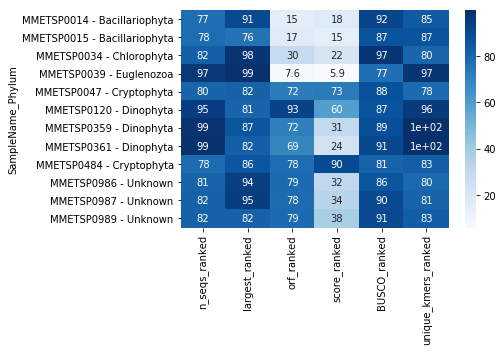

In [989]:
sns.heatmap(high_heatmap, annot=True,cmap="Blues");

# Heatmap Poor

In [986]:
low_heatmap.shape

(15, 6)

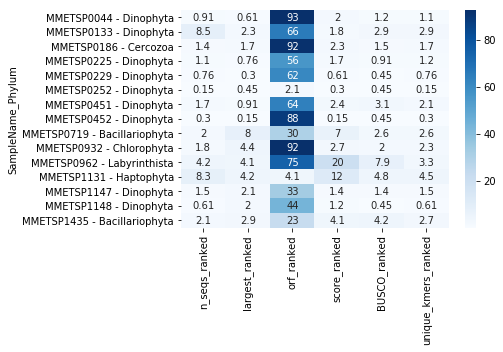

In [988]:
sns.heatmap(low_heatmap, annot=True,cmap="Blues");